In [1]:
!pip install yfinance # run this code to be able to access yfinance library.

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Some libraries I thought we would need to use.
# Please feel free to add more that are needed

In [3]:
musk = pd.read_csv("elonmusk.csv")
musk.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


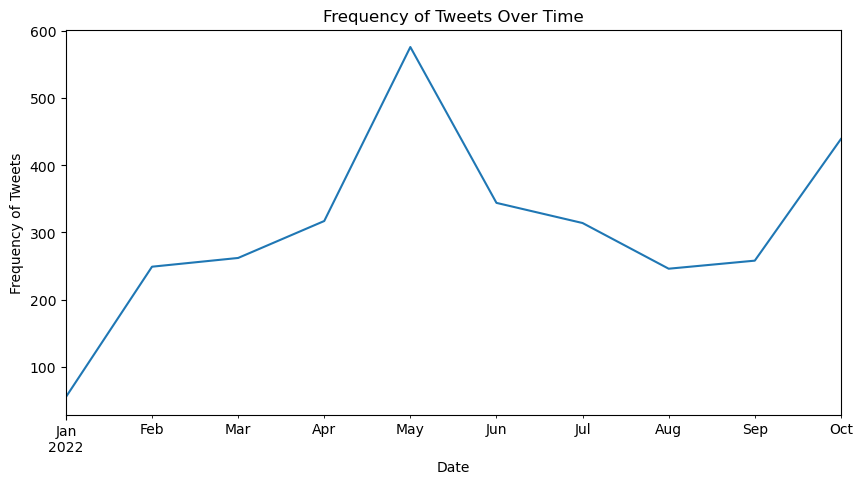

In [6]:
musk['Date'] = pd.to_datetime(musk['Date'])

musk.set_index('Date', inplace=True)

frequency = musk.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets')
plt.title('Frequency of Tweets Over Time')

plt.show()

In [4]:
trump = pd.read_csv("trumptweets.csv", parse_dates=["date"])
trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


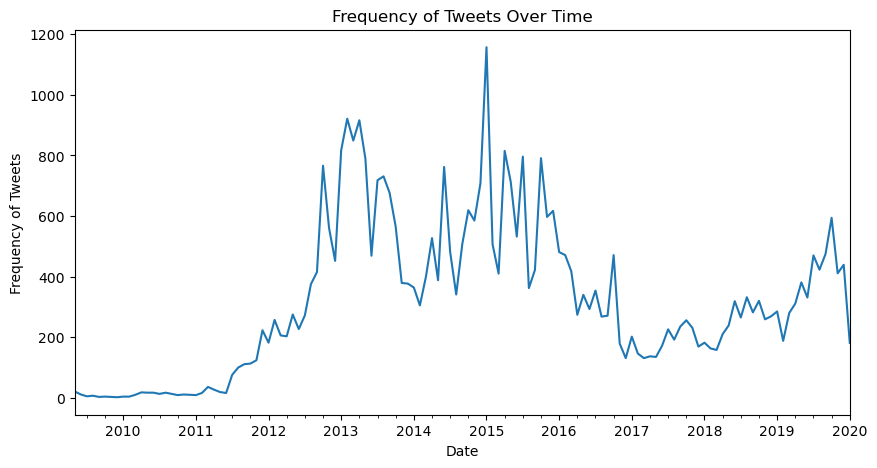

In [5]:
trump['date'] = pd.to_datetime(trump['date'])

trump.set_index('date', inplace=True)

frequency = trump.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets')
plt.title('Frequency of Tweets Over Time')

plt.show()